In [ ]:
import io
jis = {}
codings_file = open("codings.txt", 'r')
for line in codings_file:
    buf = line.split()
    jis[buf[0]] = buf[1]




#hira_string = ''
#kata_string = ''
#hira = io.open("hiragana.txt", mode = 'r', encoding = "utf-8")
#kata = io.open("katakana.txt", mode = 'r', encoding = "utf-8")
#for line in hira:
#    hira_string += line

#for line in kata:
#    kata_string += line

#Проверка на то что символ кана через файл а не словарь
def checkKana_file(kana):
    with io.open("katakana.txt", encoding = 'utf-8') as f:
        if kana in f.read():
            return True
        else:
            return False
# Нахождение нужной кодировки через файл а не словарь       
def coding(code):
    with open("codings.txt") as f:
        for line in f:
            if code == line[:6]:
                return line[6:]

print(coding("0x213D"))
def coding_test():
    with open("codings.txt") as f:
        for line in f:
            pass
        print("done")

        

In [ ]:
#files = ["ETL9B_1","ETL9B_2","ETL9B_3","ETL9B_4","ETL9B_5"]
files = ["ETL9B_1","ETL9B_2"]

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import PIL
from PIL import Image
#from tqdm import tqdm
#!pip install bitstring
import bitstring
"""
filename = "ETL9B_1"
file_stream = bitstring.ConstBitStream(filename=filename)


width = 64
height = 63

record = file_stream.readlist('int:16,uint:16,uint:32,bytes:504,pad:512')
record_dict = {
     'sheet_number': record[0], # type: int - Serial Sheet Number
     'JIS_KANJI_CODE': record[1], # type: binary - JIS Kanji Code (JIS X 0208)
     'JIS_READING': record[2], # type: ASCII - JIS Typical Reading (e.g. 'AI.M')
     'image_data': record[3], # type: bytes
}


np_img = np.array(Image.frombytes('1', (width, height), record_dict['image_data'], 'raw')).astype(np.uint8)
plt.imshow(np_img)
#plt.colorbar()
"""

'\nfilename = "ETL9B_1"\nfile_stream = bitstring.ConstBitStream(filename=filename)\n\n\nwidth = 64\nheight = 63\n\nrecord = file_stream.readlist(\'int:16,uint:16,uint:32,bytes:504,pad:512\')\nrecord_dict = {\n     \'sheet_number\': record[0], # type: int - Serial Sheet Number\n     \'JIS_KANJI_CODE\': record[1], # type: binary - JIS Kanji Code (JIS X 0208)\n     \'JIS_READING\': record[2], # type: ASCII - JIS Typical Reading (e.g. \'AI.M\')\n     \'image_data\': record[3], # type: bytes\n}\n\n\nnp_img = np.array(Image.frombytes(\'1\', (width, height), record_dict[\'image_data\'], \'raw\')).astype(np.uint8)\nplt.imshow(np_img)\n#plt.colorbar()\n'

In [ ]:
record = file_stream.readlist('int:16,uint:16,uint:32,bytes:504,pad:512')
record_dict = {
     'sheet_number': record[0], # type: int - Serial Sheet Number
     'JIS_KANJI_CODE': record[1], # type: binary - JIS Kanji Code (JIS X 0208)
     'JIS_READING': record[2], # type: ASCII - JIS Typical Reading (e.g. 'AI.M')
     'image_data': record[3], # type: bytes
}


np_img = np.array(Image.frombytes('1', (width, height), record_dict['image_data'], 'raw')).astype(np.uint8)
plt.imshow(np_img, cmap = 'gray')
plt.colorbar()


In [ ]:
print(record[0:3])
print(np_img.shape)
np_img = cv2.resize(np_img, dsize=(64, 64), interpolation=cv2.INTER_NEAREST)
print(np_img.shape)

In [ ]:
def toKanji(ch_code):
    ch_hex = hex(ch_code)
    ch_hex = ch_hex[2:].upper()
    ch_hex = "0x" + ch_hex
    ch_jis = jis[ch_hex]
    #ch_jis = coding(ch_hex)
    uni_char = chr(int(ch_jis,0))
    return uni_char

In [ ]:
print(toKanji(record[1]))

In [ ]:
#jis_kanji = {}
#for code in jis:
#    jis_kanji[jis[code]] = chr(int(jis[code],0))

    
    
#def check_kana(code):
#    ch = toKanji(code)
#    if (ch in hira_string) or (ch in kata_string):
#        return True
#    else:
#        return False

#print(checkKana_file(13613))
print(toKanji(13612))
print(checkKana_file("規"))
print(checkKana_file("ぬ"))
if checkKana_file(toKanji(13612)):
    print("da")
else:
    print("net")

In [ ]:
#Getting all samples 
from tqdm import tqdm

samples_count = 0
X_images = []
Y_labels = []

width = 64
height = 63

for filename in tqdm(files):
    file_stream = bitstring.ConstBitStream(filename=filename)
    file_stream.readlist("bytes:576")
    
    while True:
        try:
            record = file_stream.readlist('int:16,int:16,uint:32,bytes:504,pad:512')
        except:
            break
        if checkKana_file(toKanji(record[1])):
            continue
        else:
            samples_count +=1
            np_img = np.array(Image.frombytes('1', (width, height), record[3], 'raw')).astype(np.uint8)
            np_img = cv2.resize(np_img, dsize=(64, 64), interpolation=cv2.INTER_NEAREST)
            np_img = np.reshape(np_img, (64,64,1))
            X_images.append(np_img)
            Y_labels.append(toKanji(record[1]))





In [ ]:
print(samples_count)
#plt.imshow(X_images[1934], cmap = 'gray')
#test_img = X_images[25631]
#test_img = np.reshape(test_img, (64,64))
#print(test_img.shape)
#plt.imshow(test_img, cmap ="gray")
#plt.colorbar()


In [ ]:
print(Y_labels[27424])
print(np.array_equal(X_images[56], X_images[9313]))

In [ ]:
test_img = X_images[27424]
test_img = np.reshape(test_img, (64,64))
print(test_img.shape)
plt.imshow(test_img, cmap ="gray")
plt.colorbar()

In [ ]:
ind = 0
Y_index = {}
for kanji in Y_labels:
    if kanji not in Y_index:
        Y_index[kanji] = ind
        ind +=1
    else:
        pass
    
print(len(Y_index))
print(Y_index)

In [ ]:
label_file = io.open("Kanji_Labels.txt", "w+", encoding = 'utf-8')
for line in Y_index:
    label_file.write(str(Y_index[line]) + ":" + line + "\n")

In [ ]:
Y_lab = []
for line in Y_labels:
    Y_lab.append(Y_index[line])
print(len(Y_lab))

In [1]:
import pickle
from sklearn.externals import joblib


c:\users\acer\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
filenameX = 'X_images.sav'
filenameY = "Y_labels.sav"
joblib.dump(X_images, filenameX)
joblib.dump(Y_lab, filenameY)

In [ ]:
'''pickle_out = open("X.pickle", "wb")
pickle.dump(X_images, pickle_out)
pickle_out.close()

pickle_out = open("Y.pickle", "wb")
#pickle.dump(Y_lab, pickle_out)
pickle.dump(Y_labels, pickle_out)
pickle_out.close()
'''

In [2]:
X = joblib.load("X_images.sav")

In [ ]:
print(Y[65237])

(64, 64)


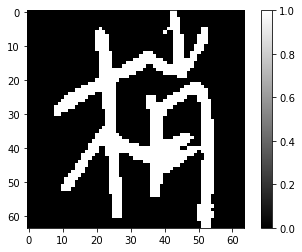

In [6]:
test_img = X[200001]
test_img = np.reshape(test_img, (64,64))
print(test_img.shape)
plt.imshow(test_img, cmap ="gray")
plt.colorbar()